# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
colnames = ['sample_code_number', 'Clump_thickness', 'Uniformity_cell_size', 'Uniformity_cell_shape', 'Marginal_Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
cancer_df = pd.read_csv('breast-cancer-wisconsin.data.txt', sep=",", header=None, names = colnames)
cancer_df.head(10)

FileNotFoundError: File b'breast-cancer-wisconsin.data.txt' does not exist

In [ ]:
cancer_df.drop(['sample_code_number'], axis =1, inplace = True)
cancer_df.head(5)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [3]:
cancer_df.dtypes

NameError: name 'cancer_df' is not defined

In [7]:
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].replace('?', np.NaN)

In [8]:
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].fillna(cancer_df['Bare Nuclei'].median())

In [9]:
cancer_df.dtypes

Clump_thickness                 int64
Uniformity_cell_size            int64
Uniformity_cell_shape           int64
Marginal_Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [10]:
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype('int64')

In [11]:
cancer_df.dtypes

Clump_thickness                int64
Uniformity_cell_size           int64
Uniformity_cell_shape          int64
Marginal_Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [12]:
cancer_df.shape

(699, 10)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [13]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [14]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [15]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [16]:
# Check for correlation of variable
cancer_df.corr()

,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Uniformity_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Uniformity_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [17]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


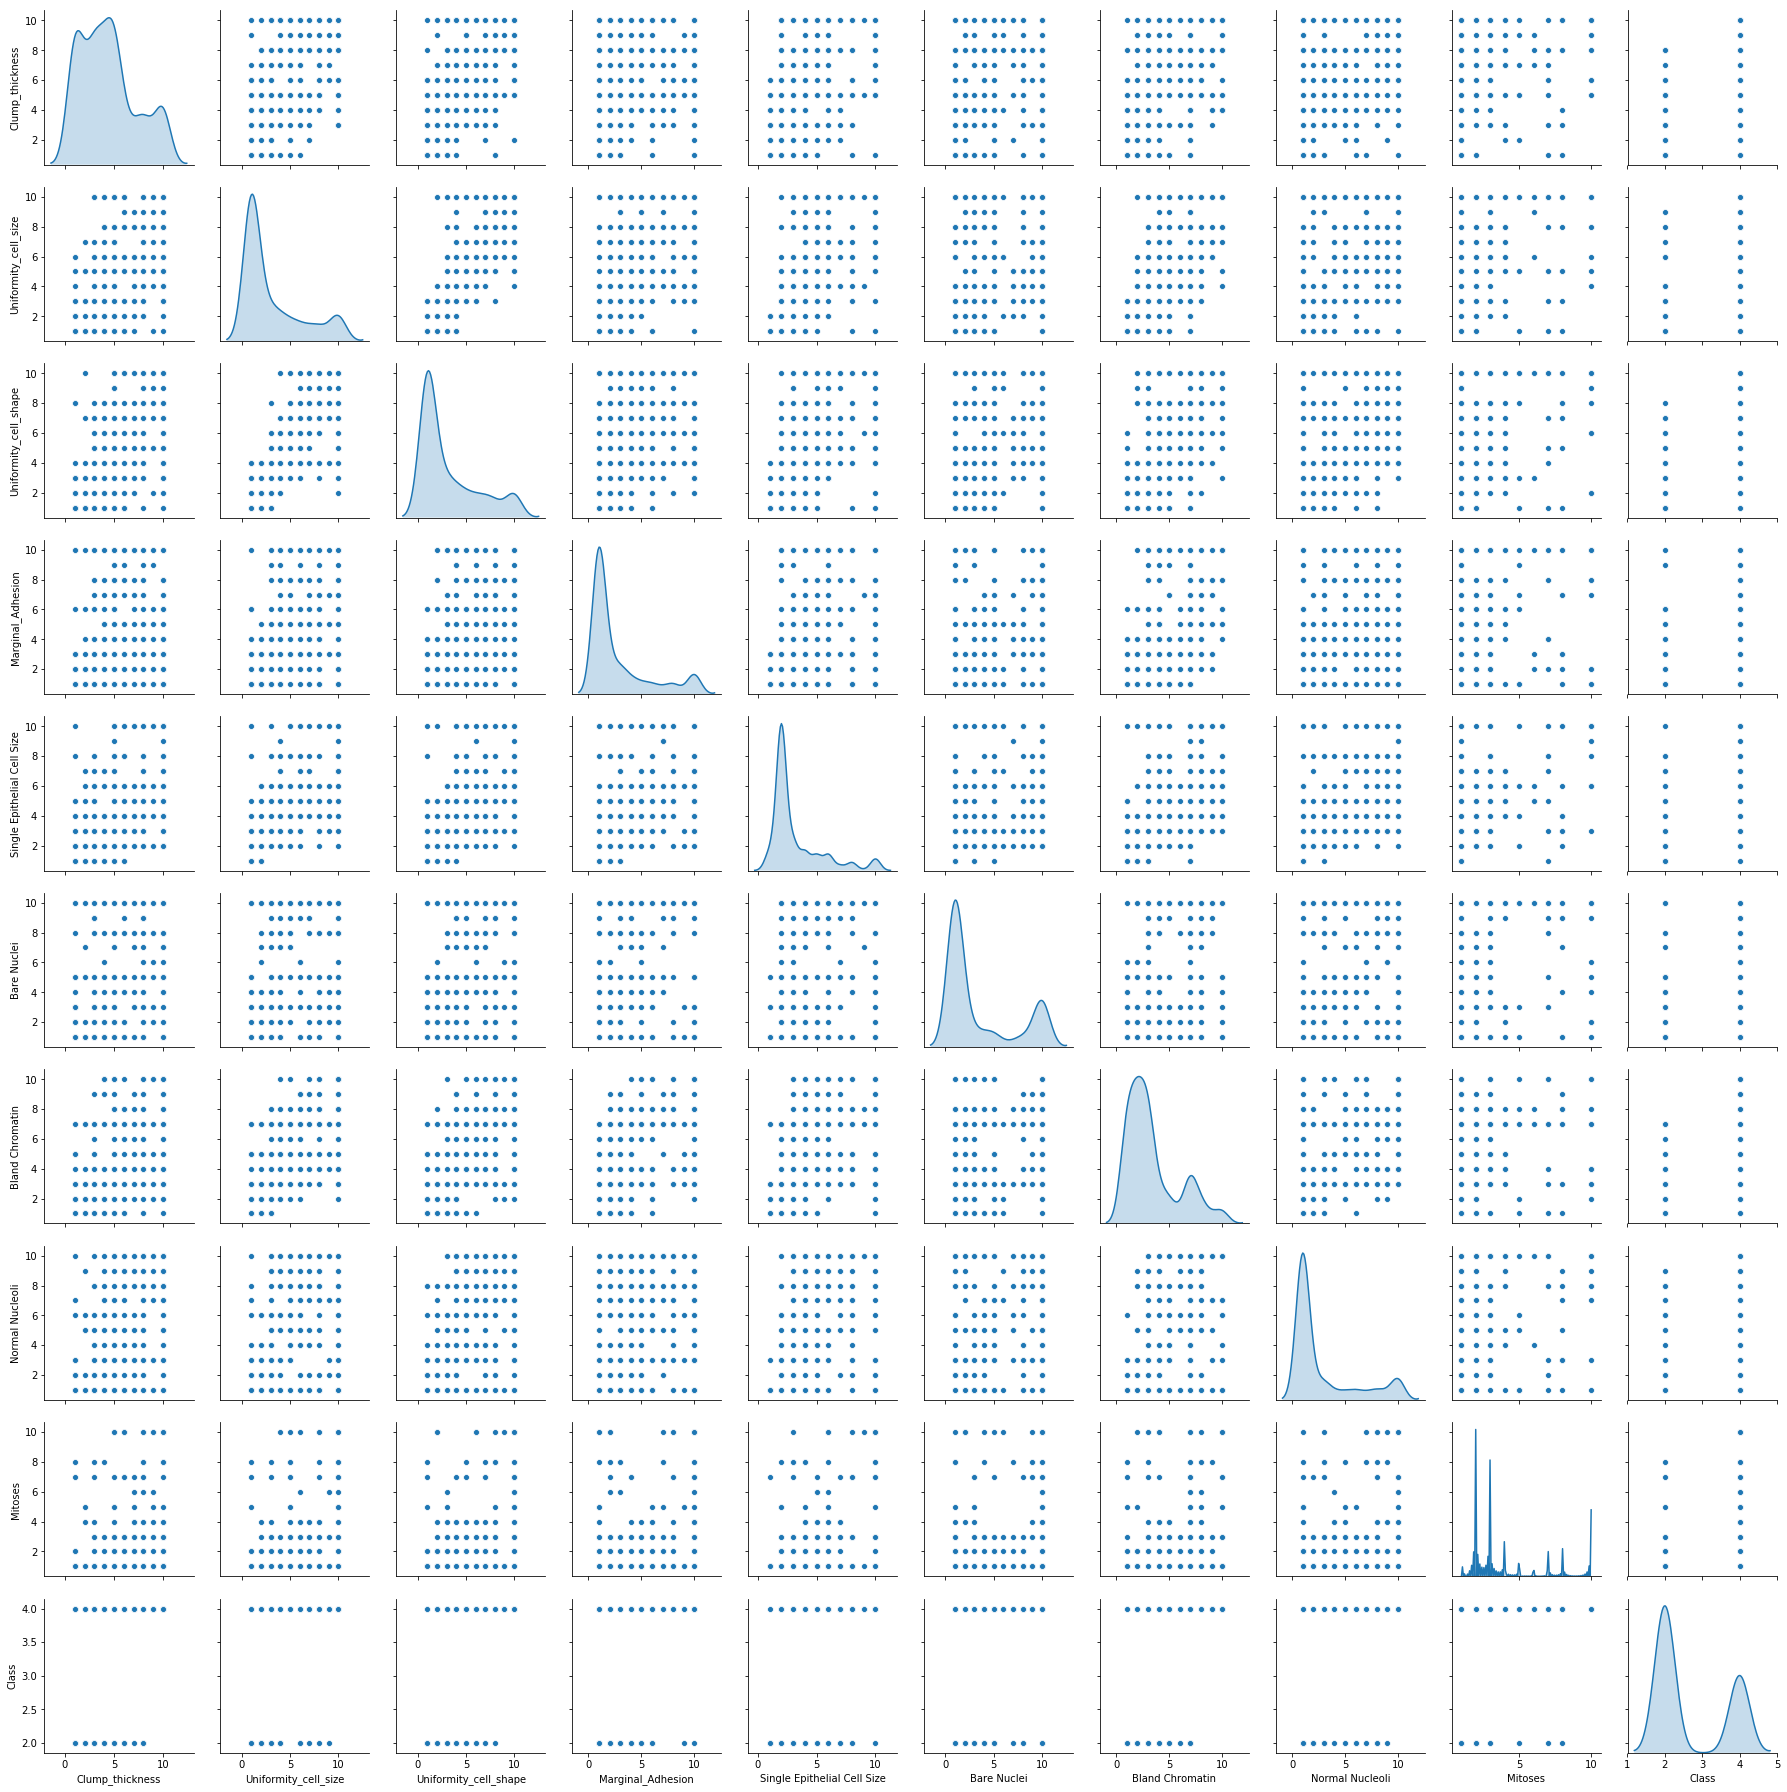

In [18]:
#Let us check for pair plots
sns.pairplot(cancer_df, diag_kind='kde') 

In [19]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

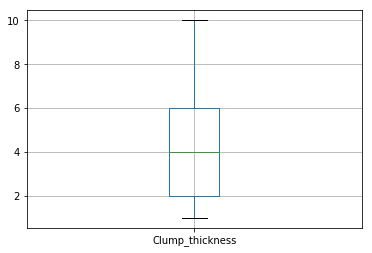

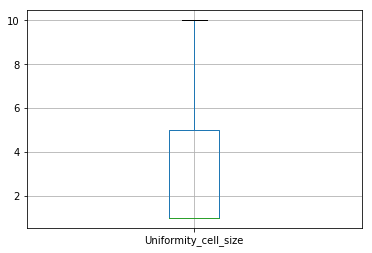

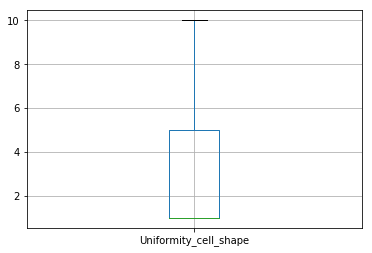

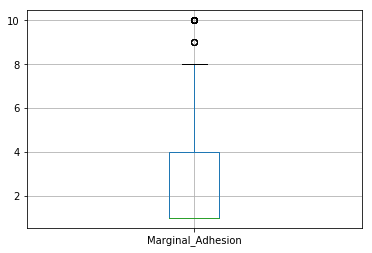

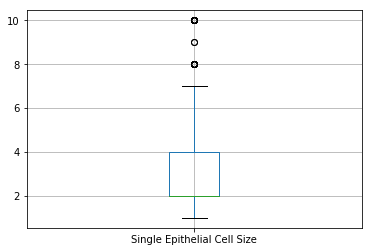

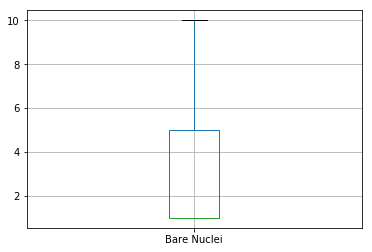

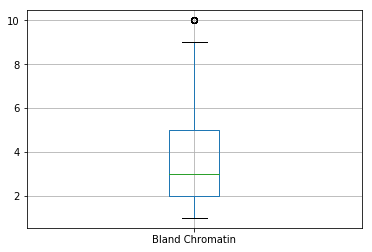

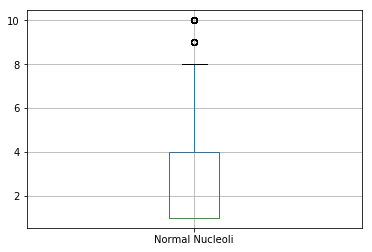

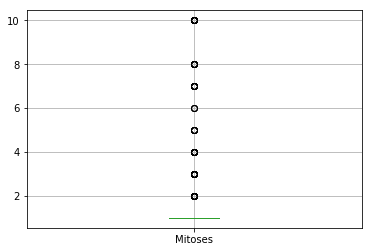

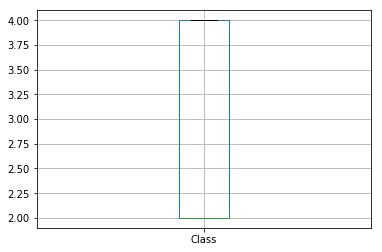

In [20]:
import matplotlib.pyplot as plt

for column in cancer_df:
    plt.figure()
    cancer_df.boxplot([column])

In [21]:
Q1 = cancer_df.quantile(0.25)
Q3 = cancer_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Clump_thickness                4.0
Uniformity_cell_size           4.0
Uniformity_cell_shape          4.0
Marginal_Adhesion              3.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    4.0
Bland Chromatin                3.0
Normal Nucleoli                3.0
Mitoses                        0.0
Class                          2.0
dtype: float64


In [22]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [23]:
# Split the wine data into separate training (70%) and test (30%) sets and then standardize it to unit variance:


X = cancer_df[cancer_df.columns[1:-1]]
y = cancer_df["Class"]
# remove target variable column before PCA as PCA does dimensionality reduction of independent variables only.
cancer_df.drop(['Class'], axis =1, inplace = True)

In [24]:
# PCA
# Step 1 - Create covariance matrix
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[1.00143266 0.90818117 0.70659267 0.75287621 0.68765657 0.75680368
  0.72390044 0.4593503 ]
 [0.90818117 1.00143266 0.68405782 0.72069948 0.70848734 0.73700282
  0.72047704 0.43953974]
 [0.70659267 0.68405782 1.00143266 0.60045809 0.66792658 0.66767051
  0.60421681 0.41823111]
 [0.75287621 0.72069948 0.60045809 1.00143266 0.5845377  0.61698451
  0.62978166 0.47978787]
 [0.68765657 0.70848734 0.66792658 0.5845377  1.00143266 0.67518063
  0.5756016  0.34288766]
 [0.75680368 0.73700282 0.66767051 0.61698451 0.67518063 1.00143266
  0.66683179 0.34466258]
 [0.72390044 0.72047704 0.60421681 0.62978166 0.5756016  0.66683179
  1.00143266 0.42894941]
 [0.4593503  0.43953974 0.41823111 0.47978787 0.34288766 0.34466258
  0.42894941 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [25]:
# Step 2- Get eigen values and eigen vector

In [26]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.39847994 -0.062414   -0.73601628 -0.20398524 -0.14132791  0.43266205
  -0.21598654  0.01296432]
 [-0.39370776 -0.09340305  0.66494297 -0.18506849 -0.12668727  0.55098835
  -0.1426921   0.14096705]
 [-0.35272931 -0.08531517  0.04692692  0.5248911   0.12334922  0.09451857
   0.08350668 -0.7479762 ]
 [-0.35462838  0.14260532  0.0679272  -0.35935778 -0.63861856 -0.46940404
   0.18406897 -0.24102929]
 [-0.34696126 -0.25494788 -0.07379637  0.52742009 -0.18497738 -0.10368618
   0.41414996  0.56081545]
 [-0.36327475 -0.25577122  0.0587669   0.02887731  0.26700296 -0.50964666
  -0.6712839   0.1291229 ]
 [-0.35310871  0.00382172 -0.01896902 -0.43307607  0.65074018 -0.09716218
   0.50431126  0.01232102]
 [-0.24288322  0.91067748  0.00744054  0.23006578  0.10935296 -0.00323347
  -0.12514757  0.1762334 ]]

 Eigen Values 
%s [5.40438223 0.76982562 0.0889498  0.46721886 0.38250129 0.27328063
 0.2960949  0.32920798]


In [27]:
# Eigen Values (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.404382234667025, array([-0.39847994, -0.39370776, -0.35272931, -0.35462838, -0.34696126,
       -0.36327475, -0.35310871, -0.24288322])), (0.7698256196395442, array([-0.062414  , -0.09340305, -0.08531517,  0.14260532, -0.25494788,
       -0.25577122,  0.00382172,  0.91067748])), (0.4672188605414042, array([-0.20398524, -0.18506849,  0.5248911 , -0.35935778,  0.52742009,
        0.02887731, -0.43307607,  0.23006578])), (0.38250128975529796, array([-0.14132791, -0.12668727,  0.12334922, -0.63861856, -0.18497738,
        0.26700296,  0.65074018,  0.10935296])), (0.3292079816888978, array([ 0.01296432,  0.14096705, -0.7479762 , -0.24102929,  0.56081545,
        0.1291229 ,  0.01232102,  0.1762334 ])), (0.2960948984112916, array([-0.21598654, -0.1426921 ,  0.08350668,  0.18406897,  0.41414996,
       -0.6712839 ,  0.50431126, -0.12514757])), (0.273280633641952, array([ 0.43266205,  0.55098835,  0.09451857, -0.46940404, -0.10368618,
       -0.50964666, -0.09716218, -0.00323347])), (0.088

# Q8 Find variance and cumulative variance by each eigen vector

In [28]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
print(var_explained)
print(cum_var_exp)

[0.674581330435906, 0.09609053692925647, 0.05831880626929548, 0.04774425970121569, 0.04109212646975157, 0.03695891256993592, 0.034111209277911766, 0.011102818346727276]
[0.67458133 0.77067187 0.82899067 0.87673493 0.91782706 0.95478597
 0.98889718 1.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
print(principalComponents)

[[-4.81033187  0.16238075  0.01225022 -0.07313546 -0.46133371]
 [ 4.91013722 -4.94020987  0.38172186  0.91222013  2.00921478]
 [-4.35092984 -0.63096103 -0.3209824  -0.06353808 -0.25487377]
 ...
 [10.639943    7.14287367 -2.19279269  2.46174554 -2.11290988]
 [ 6.90456131  2.38056983 -0.68917066  0.63760433 -4.60655478]
 [ 8.04620422  1.0328072   0.9953838   2.25909651 -4.49068757]]


# Q10 Find correlation between components and features

In [30]:
corr(principalComponents,X)

NameError: name 'corr' is not defined

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

In [ ]:
movies_df = pd.read_csv('movies_metadata.csv')
movies_df

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

In [ ]:
movies_df['description'] = movies_df['overview'] + movies_df['tagline']
movies_df['description']

# Q13  Lets drop the null values in `description` column

In [ ]:
movies_df = movies_df.dropna(subset=['description'])
movies_df['description']

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

In [ ]:
movies_df.drop_duplicates(subset='title', keep='first', inplace=False)

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

In [ ]:
movies_df.reset_index(drop = True)

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies_df['description'])
tfidf_matrix.shape

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [31]:
jokesDf = pd.read_csv("jokes.csv")
jokesDf.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [32]:
jokesDf.shape

(24983, 101)

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [33]:
ratings = pd.DataFrame( jokesDf.iloc[:200,1:])
ratings.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [34]:
ratings.columns = np.arange(0,100)
ratings.head(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [35]:
ratings = ratings.replace(99,0)
ratings.head(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [36]:
sc = StandardScaler()
ratings_diff = pd.DataFrame(sc.fit_transform(ratings))
ratings_diff.head(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.24083,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.50553,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461


In [37]:
ratings_Trans = ratings_diff.T

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [38]:
ratings_Trans["mean"] = ratings_Trans.mean(axis = 0)

In [39]:
ratings_Trans.sort_values(["mean"],ascending=False).head(10)["mean"]
#top 10 jokes number 94,44,86,13,17,73,46,34,2,36 

94    1.033314
44    1.014903
86    0.984949
13    0.879180
17    0.774465
73    0.767659
46    0.748349
34    0.627019
2     0.597521
36    0.593331
Name: mean, dtype: float64